In [14]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Here we let the random variable $X$ be one of 'tiny', 'small', 'medium', or 'large' with some probability.

$$
   f(x) = \sum_i^n{x_i}
$$

In [15]:
# length_of_bag = {
#     'tiny': 1,
#     'small': 0.75,
#     'medium': 0.5,
#     'large': 0.25
# }

probability_of_dog = {
    'tiny': 0.1,
    'small': 0.4,
    'medium': 0.4,
    'large': 0.1
}

def sample_from_dict(d):
    items = []
    probs = []
    for k, v in d.items():
        items.append(k)
        probs.append(v)
    sample = np.random.choice(items, p=probs)
    return sample

In [16]:
sample_from_dict(probability_of_dog)

'small'

In [17]:
def sample_num_dogs():
    mean = 3
    std = 2
    sample = np.random.normal(mean, std)
    while sample < 1:
        sample = np.random.normal(mean, std)
    sample = int(sample)
    return sample

In [18]:
sample_num_dogs()

1

In [19]:
def num_to_buy(counts):
    count = 0
    for i, c in enumerate(counts):
        if c == 0:
            count += 1
            counts[i] = 1
    return count

def decrease(types, counts):
    for i, c in enumerate(counts):
        if types[i] == 'tiny':
            counts[i] -= 0.25
        elif types[i] == 'medium' or types[i] == 'small':
            counts[i] -= 0.5
        else:
            counts[i] -= 1.0

def simulate_customer():
    num_dogs = sample_num_dogs()
    num_weeks = 52
    types = []
    counts = []
    for n in range(num_dogs):
        types.append(sample_from_dict(probability_of_dog))
        counts.append(0)
    
    count = 0
    for week in range(num_weeks):
        count += num_to_buy(counts)
        decrease(types, counts)
        
    return count
        
    
    
    
    
    

In [37]:
def check_condition(curr, target):
    for k in curr.keys():
        if curr[k] < target[k]:
            return True
    return False

def num_puppy(npurchased):
    letters = ['P', 'U', 'Y']
    probs = [0.1, 0.05, 0.85]
    num_buys = 0
    num_wins = 0
    winning_condition = {
        'P': 3,
        'U': 1,
        'Y': 1
    }
    current_count = {
        'P': 0,
        'U': 0,
        'Y': 0
    }
    
    for pid in range(npurchased):
        if not check_condition(current_count, winning_condition):
            current_count['P'] = 0
            current_count['U'] = 0
            current_count['Y'] = 0
            num_wins += 1
        letter = np.random.choice(letters, p=probs)
        current_count[letter] += 1
        num_buys += 1
        
        
    return num_wins

In [38]:
num_puppy(simulate_customer())

5

In [39]:
def runs(nruns):
    arr = []
    for i in range(nruns):
        number_of_bags_purchased = simulate_customer()
        number_of_times_won = num_puppy(number_of_bags_purchased)
        arr.append(number_of_times_won)
    return np.array(arr)

In [40]:
results = runs(10000)

(array([1603., 2798., 2411., 1646.,  858.,  422.,  169.,   64.,   21.,
           8.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

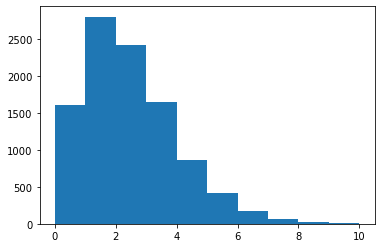

In [41]:
plt.hist(results)

In [42]:
np.mean(results)

1.9804

In [31]:
np.min(results)

0

In [32]:
np.max(results)

7

In [33]:
np.std(results)

1.0236679149020935

In [34]:
np.median(results)

1.0

In [35]:
import scipy.stats as stats

In [36]:
stats.mode(results)

ModeResult(mode=array([1]), count=array([3724]))

In [43]:
plt.savefig('Plot of Scam.png')